# Periodic behaviour
This notebook shows periodic solutions in the Logistic map

In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import root

In [3]:
cmap = plt.get_cmap('Pastel1')
cmap_cobweb = plt.get_cmap('Set1')

In [4]:
# The logistic map, f(x) = rx(1-x).
def logistic_map(x_n, r=4):
    return r * x_n * (1 - x_n)

def tent_map(x_n):
    x_ = np.where(x_n <= 0.5, 2 * x_n, 2 * (1 - x_n))
    return x_

In [5]:
def plot_base(f, pars=None, p_order=0):
    # Make the base image for a cobweb plot.
    
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111)
    
    if pars is None:
        pars = {}

    # Plot y = f(x) and y = x
    x_n_plus_1 = f(x, *pars)
    ax.plot(x, x_n_plus_1, c='darkgrey', lw=2, label='Iteration 1')
    for i in range(p_order):
        x_n_plus_1 = f(x_n_plus_1, *pars)
        ax.plot(x, x_n_plus_1, c=cmap((i+1)/(p_order+1)), lw=2, label='Iteration ' + str(i+2))
        
    ax.plot(x, x, c='darkgrey', lw=2)

    # Annotate and tidy the plot.
    ax.set_xlabel('$x$')
    ax.set_ylabel('$x_{n+1}$')
    ax.legend()
    return fig, ax

In [6]:
def plot_cobweb(f, fig, ax, x0=0.5, pars=None, nmax=200, color='b'):
    # Make a cobweb plot ontop of existing plot
    if pars is None:
        pars = {}

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], *pars)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.scatter(px[0], py[0], color=color)
    ax.plot(px[1:], py[1:], c=color, alpha=1)
    return ax

In [7]:
def numerically_find_roots(func, pars=None, order=0, num_iter=100, tol=1e-12):
    if pars is None:
        pars = {}
        
    def _find_x_y_intersection(x):
        x_n_plus_1 = func(x, *pars)
        
        for _ in range(order):
            x_n_plus_1 = func(x_n_plus_1, *pars)
            
        return x_n_plus_1 - x
    
    guesses = np.random.rand(num_iter)
    roots = list()
    for i in range(num_iter):
        res = root(_find_x_y_intersection, guesses[i], tol=tol)
        if res.success:
            if res.x[0] not in roots:
                roots.append(res.x[0])
    
    return roots

### Tent Map

In [19]:
k_period = 2

In [34]:
roots = numerically_find_roots(tent_map, order=k_period)
roots

[0.2857142857142857,
 0.4444444444444444,
 0.2222222222222222,
 0.8571428571428571,
 0.0,
 0.5714285714285714,
 0.8888888888888888,
 0.6666666666666666]

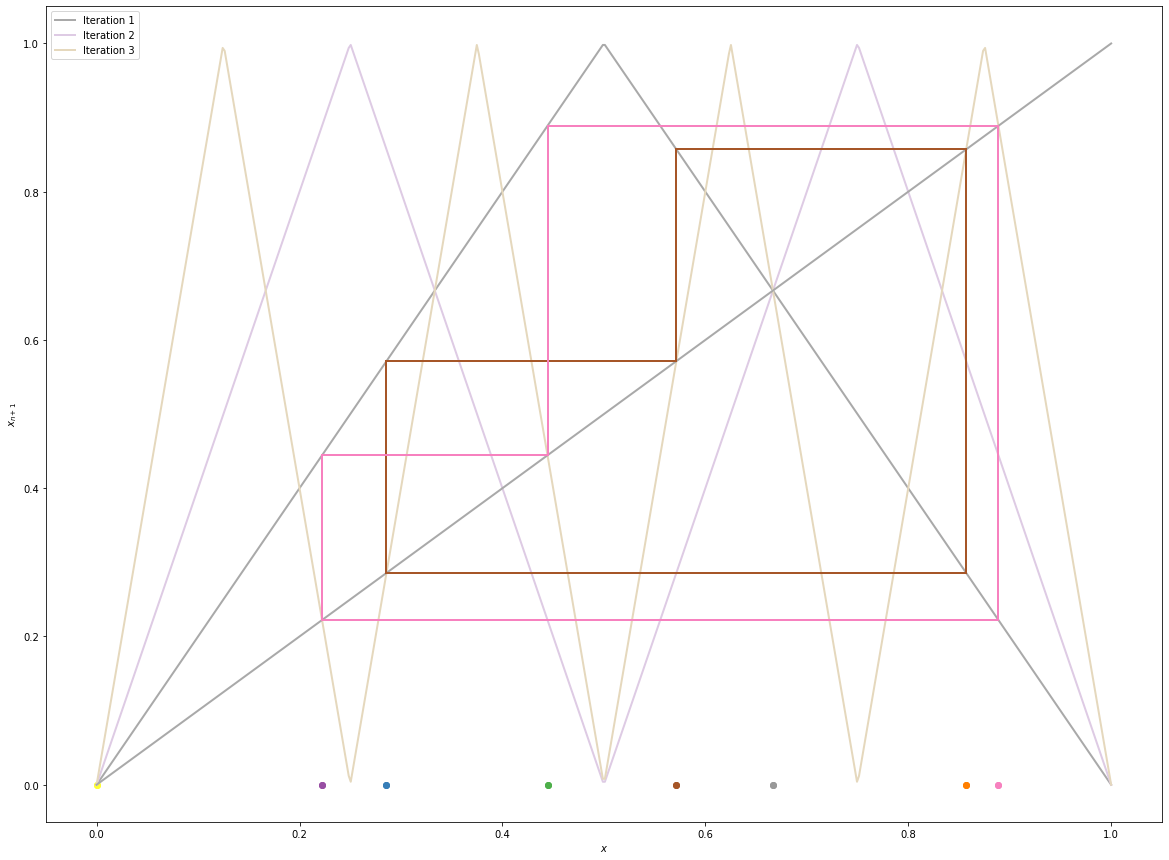

In [35]:
fig, ax = plot_base(tent_map, p_order=k_period)
for i, r in enumerate(roots):
    plot_cobweb(tent_map, fig, ax, r, nmax=20, color=cmap_cobweb((i+1)/(len(roots) + 1)))

### Logistic Map

!!!NOTE: The colour coding of the function and the periodic solutions do not correspond between the tent map above, and the logistic map below, the colouring is purely randomly chosen.

In [15]:
k_period = 2

In [16]:
roots = numerically_find_roots(logistic_map, order=k_period, tol=1e-15)
roots

[0.0,
 0.4131759111665348,
 0.75,
 0.9698463103929542,
 0.41317591116653485,
 0.9504844339512095,
 0.116977778440511]

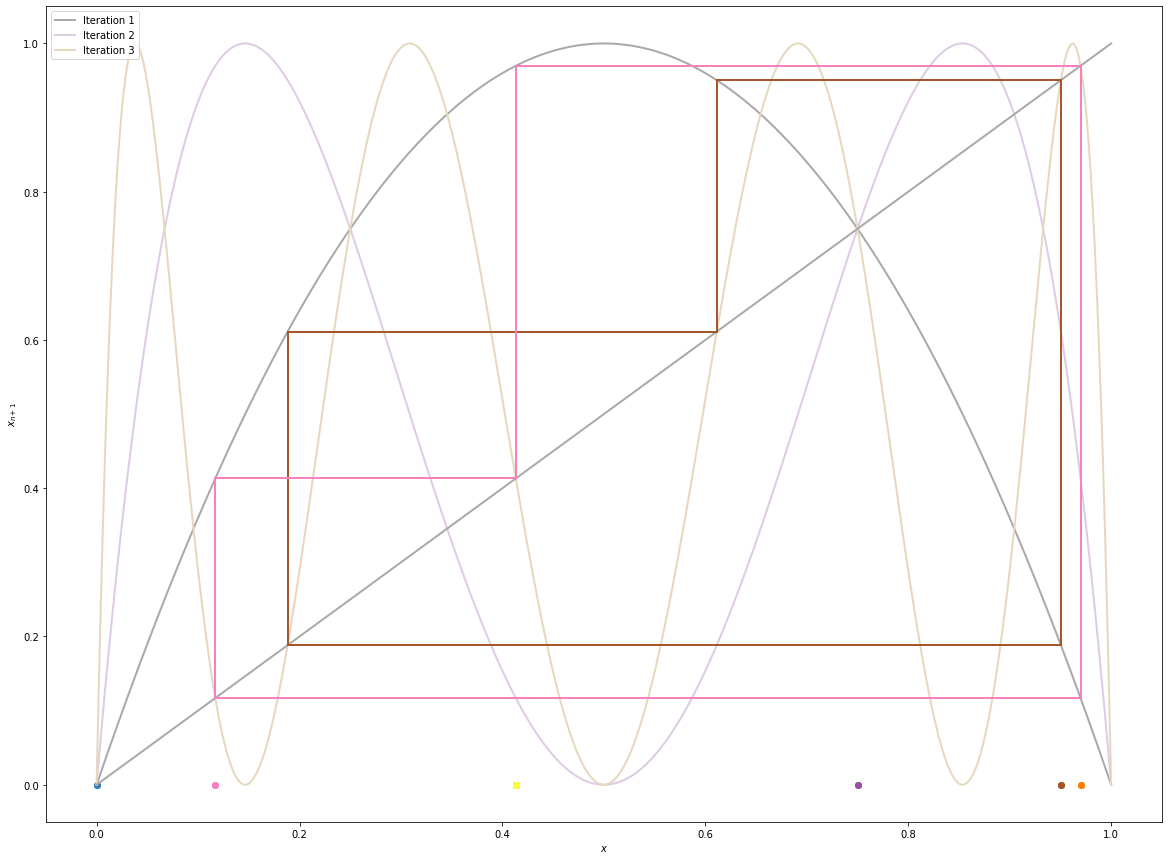

In [17]:
fig, ax = plot_base(logistic_map, p_order=k_period)
for i, r in enumerate(roots):
    plot_cobweb(logistic_map, fig, ax, r, nmax=20, color=cmap_cobweb((i+1)/(len(roots) + 1)))